9297, 0.1599719524383545, 0.23620200157165527]}
####### Calculating on the /gpu:0 #######
{'/gpu:0': [1.0259642601013184, 0.0009980201721191406, 0.003985881805419922, 0.001992940902709961, 0.0014095306396484375, 0.0025510787963867188, 0.0009989738464355469, 0.0009961128234863281, 0.0009965896606445312], '/cpu:0': [0.06378698348999023, 0.04584479331970215, 0.0976722240447998, 0.07575416564941406, 0.09569382667541504, 0.1395397186279297, 0.1599719524383545, 0.23620200157165527]}
####### Calculating on the /cpu:0 #######
{'/gpu:0': [1.0259642601013184, 0.0009980201721191406, 0.003985881805419922, 0.001992940902709961, 0.0014095306396484375, 0.0025510787963867188, 0.0009989738464355469, 0.0009961128234863281, 0.0009965896606445312], '/cpu:0': [0.06378698348999023, 0.04584479331970215, 0.0976722240447998, 0.07575416564941406, 0.09569382667541504, 0.1395397186279297, 0.1599719524383545, 0.23620200157165527, 0.29103660583496094]}
####### Calculating on the /gpu:0 #######
{'/gpu:0': [1.0259642

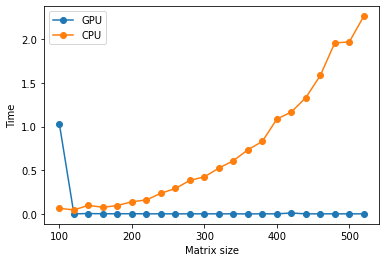

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import numpy as np

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = np.arange(100,2000,20)

    for size in matrix_sizes:
        #print(size)
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                start_time = time.time()
                r1 = tf.random.uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random.uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)
                time_taken = time.time() - start_time
                #print(dot_operation)
                device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(2)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]


plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-', label="GPU")
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-', label="CPU")
plt.legend(loc="upper left")
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2391033919846728965
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3044750132
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18277572609098030868
physical_device_desc: "device: 0, name: GeForce GTX 1650 Ti with Max-Q Design, pci bus id: 0000:58:00.0, compute capability: 7.5"
]
